In [1]:
# Import basic packages lik numpy, pandas, math plot and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
import pandas_profiling as pr
from sklearn.preprocessing import LabelEncoder

In [2]:
# Import the data using pd.read_csv() from Kaggle https://www.kaggle.com/blastchar/telco-customer-churn
df = pd.read_csv('https://raw.githubusercontent.com/lijjumathew/MSDS-Machine-Learning-1-Project/master/dataset/Telco-Customer-Churn.csv')
df.sample(5).T

1056                       1626  \
customerID              6941-PMGEP                 9504-DSHWM   
gender                      Female                       Male   
SeniorCitizen                    0                          0   
Partner                         No                         No   
Dependents                      No                         No   
tenure                           5                         20   
PhoneService                   Yes                        Yes   
MultipleLines                   No                        Yes   
InternetService        Fiber optic                        DSL   
OnlineSecurity                  No                        Yes   
OnlineBackup                    No                         No   
DeviceProtection                No                         No   
TechSupport                     No                        Yes   
StreamingTV                     No                         No   
StreamingMovies                Yes                         No   
Contract            Month-to-month             Month-to-month   
PaperlessBilling               Yes                         No   
PaymentMethod     Electronic check  Bank transfer (automatic)   
MonthlyCharges                  80                       59.2   
TotalCharges                 412.5                     1191.2   
Churn                          Yes                         No   

                                       4075                       481   \
customerID                       3160-TYXLT                 0447-BEMNG   
gender                                 Male                     Female   
SeniorCitizen                             0                          0   
Partner                                  No                        Yes   
Dependents                               No                         No   
tenure                                   53                         48   
PhoneService                             No                         No   
MultipleLines              No phone service           No phone service   
InternetService                         DSL                        DSL   
OnlineSecurity                          Yes                        Yes   
OnlineBackup                            Yes                         No   
DeviceProtection                         No                        Yes   
TechSupport                              No                         No   
StreamingTV                              No                         No   
StreamingMovies                         Yes                        Yes   
Contract                     Month-to-month             Month-to-month   
PaperlessBilling                        Yes                        Yes   
PaymentMethod     Bank transfer (automatic)  Bank transfer (automatic)   
MonthlyCharges                         46.3                       45.3   
TotalCharges                        2546.85                       2145   
Churn                                    No                        Yes   

                            7027  
customerID            0550-DCXLH  
gender                      Male  
SeniorCitizen                  0  
Partner                       No  
Dependents                    No  
tenure                        13  
PhoneService                 Yes  
MultipleLines                 No  
InternetService              DSL  
OnlineSecurity                No  
OnlineBackup                 Yes  
DeviceProtection              No  
TechSupport                  Yes  
StreamingTV                  Yes  
StreamingMovies              Yes  
Contract          Month-to-month  
PaperlessBilling              No  
PaymentMethod       Mailed check  
MonthlyCharges             73.35  
TotalCharges              931.55  
Churn                         No

In [ ]:
pr.ProfileReport(df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Replacing blank values with nulls.
df=df.replace(r'^\s*$', np.nan, regex=True)
# Total charges has some blank values/missing values and needs to be imputed. Filling the missing values
print(df.isnull().sum())
df_imputed = df.fillna(df.mean())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [5]:
# converting TotalCharges object dataset into numeric
# errors = 'coerce’ means, if invalid parsing occur then set NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

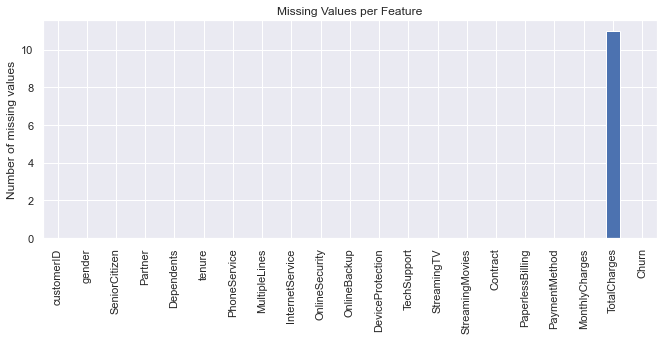

In [6]:
#the amount of missing values per feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(df).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature');


In [7]:
df_cat = df.select_dtypes(exclude=["number","bool_","float_"])
df_num = df.select_dtypes(exclude=["bool_", "object_"])

In [8]:
Id_col     = ['customerID']
target_col = ["Churn"]

In [9]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

###### Number of churn

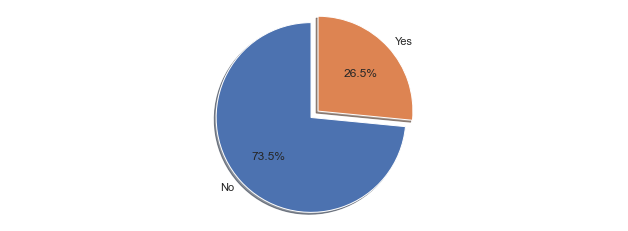

In [10]:
plt.pie(df["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',shadow=True, startangle=90,labels=df["Churn"].unique())
plt.axis('equal') ;

In [11]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2265.000258
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1400.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

From the above summary statistics we can see that
- Half of the clients remain in the company for more than 29 months (just over two years)
- The average amount per month  65 
- The average total revenue generated per customer is  2284

#### Data Transformation

In [12]:

# Getting rid of unwanted columns like Customer Id.
if 'customerID' in df:
    del df['customerID']

In [13]:
#Ideally SeniorCitizen column should be a factor, so let's convert 1,0 values to Yes,No and later we can label encode all factor columns

df.SeniorCitizen=df.SeniorCitizen.apply(lambda x: 'Yes' if x==1 else 'No')


KeyError: 'tenure_range'

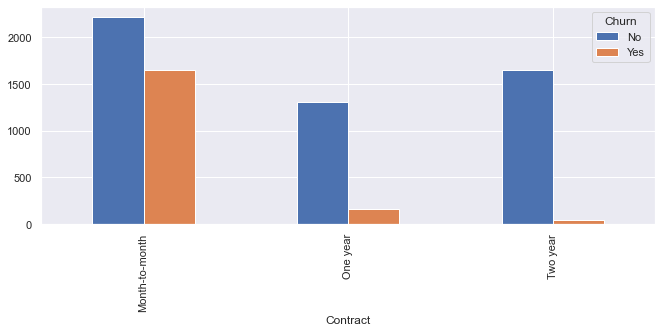

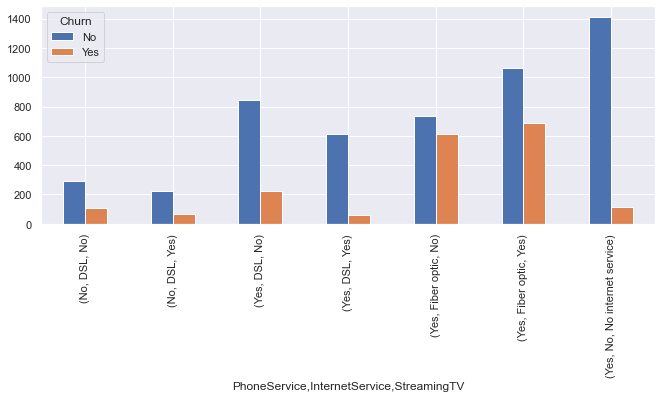

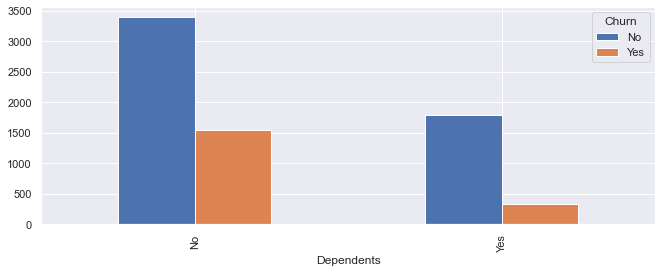

In [14]:
# Churn Analysis
churn_contract = pd.crosstab([df_imputed['Contract']], df_imputed.Churn)
churn_contract.plot(kind='bar')

churn_service = pd.crosstab([df_imputed['PhoneService'],df_imputed['InternetService'],df_imputed['StreamingTV']], df_imputed.Churn)
churn_service.plot(kind='bar')

churn_contract = pd.crosstab([df_imputed['Dependents']], df_imputed.Churn)
churn_contract.plot(kind='bar')

churn_tenure = pd.crosstab([df_imputed['tenure_range']], df_imputed.Churn)
churn_tenure.plot(kind='bar')

<AxesSubplot:xlabel='PhoneService'>

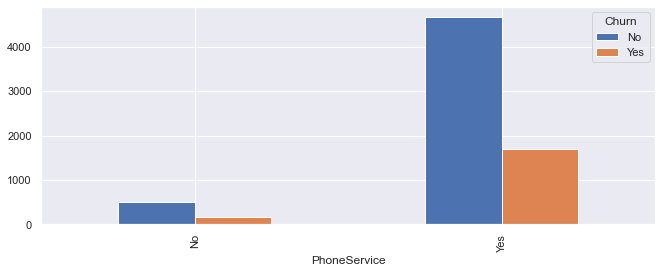

In [15]:
churn_contract = pd.crosstab([df_imputed['PhoneService']], df_imputed.Churn)
churn_contract.plot(kind='bar')

<AxesSubplot:xlabel='InternetService'>

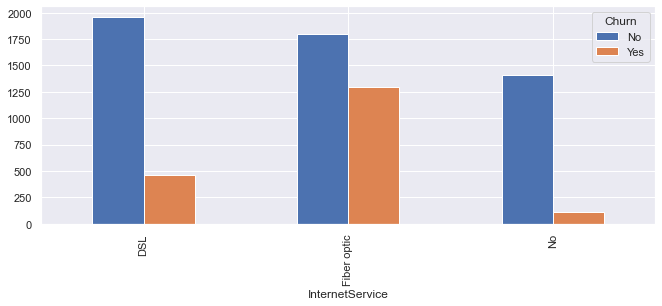

In [16]:
churn_contract = pd.crosstab([df_imputed['InternetService']], df_imputed.Churn)
churn_contract.plot(kind='bar')

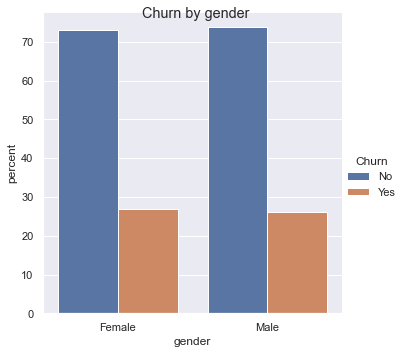

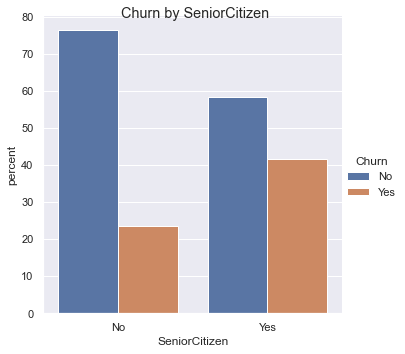

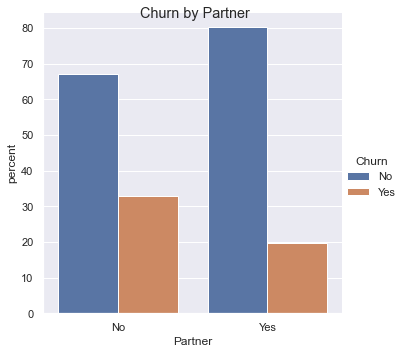

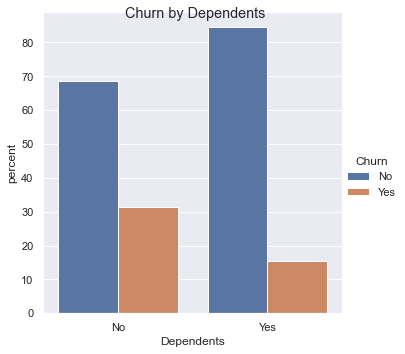

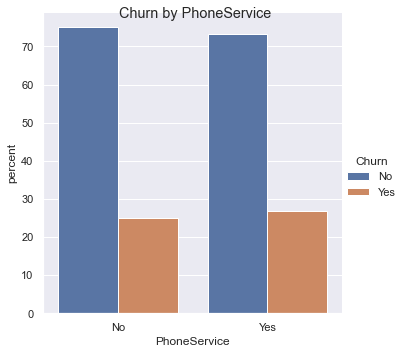

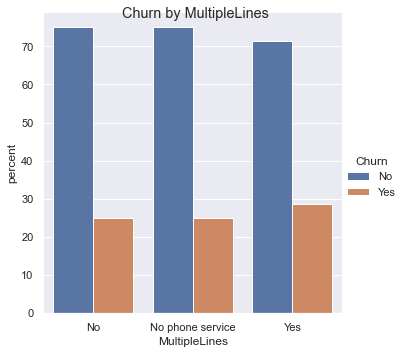

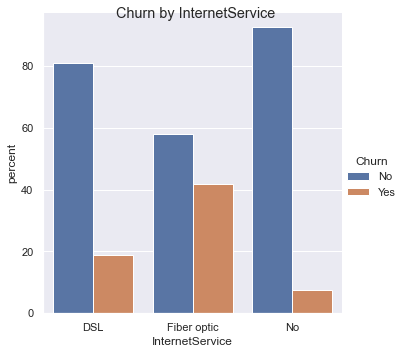

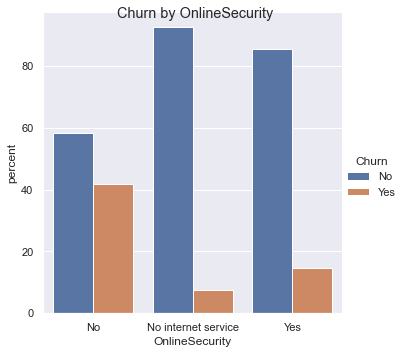

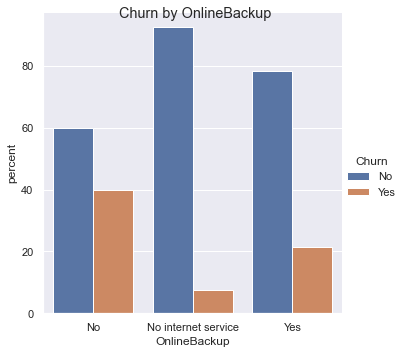

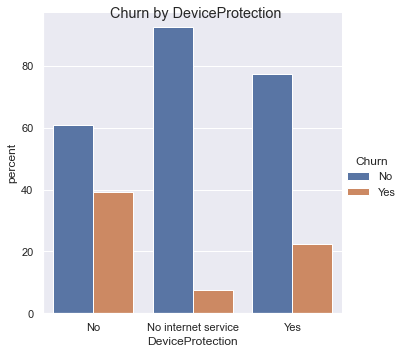

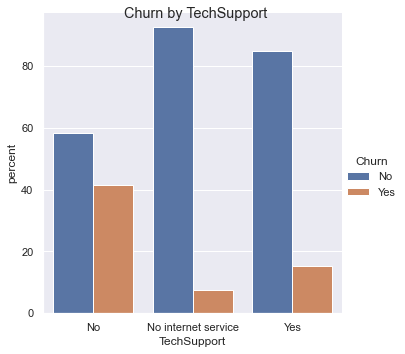

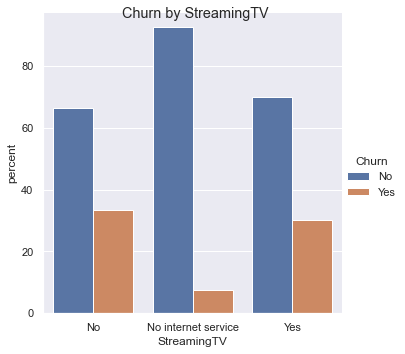

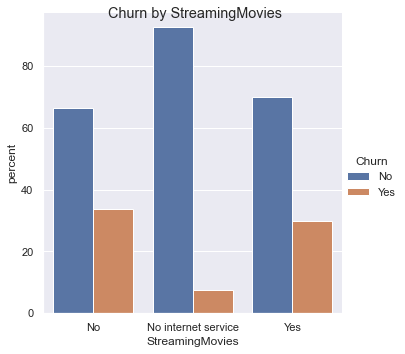

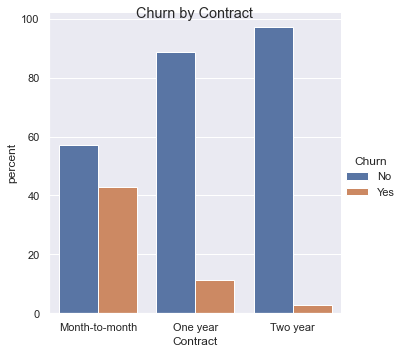

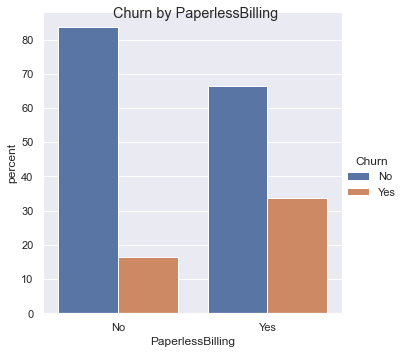

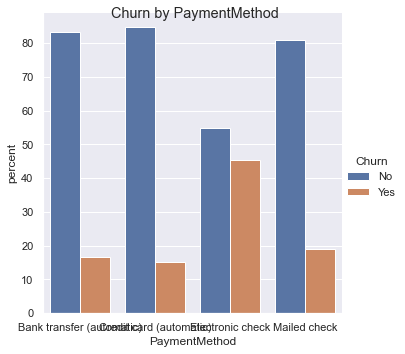

In [17]:
catvars = df.columns.tolist() 
catvars = [e for e in catvars if e not in ('TotalCharges', 'MonthlyCharges', 
                                           'tenure', 'customerID', 'Churn')]
y = 'Churn'
for x in catvars:
    plot = df.groupby(x)[y]\
        .value_counts(normalize=True).mul(100)\
        .rename('percent').reset_index()\
        .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')
    plot.fig.suptitle("Churn by " + x)
    plot

In [18]:
#create data audit report for numerical variables
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.var(),x.std(),x.mean(),x.median(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),
              x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),
              x.dropna().quantile(0.95),x.dropna().quantile(0.99)],index=['N','NMISS','SUM','VAR','STD','MEAN','MEDIAN','MIN','P1','P5','P10','P25','P50','P75','P90','P95','P99'])
num_summary = df_num.apply(lambda x : var_summary(x)).T
num_summary

N  NMISS         SUM           VAR          STD  \
SeniorCitizen   7043.0    0.0      1142.0  1.358745e-01     0.368612   
tenure          7043.0    0.0    227990.0  6.031681e+02    24.559481   
MonthlyCharges  7043.0    0.0    456116.6  9.054109e+02    30.090047   
TotalCharges    7032.0   11.0  16056168.7  5.138252e+06  2266.771362   

                       MEAN    MEDIAN    MIN    P1      P5    P10     P25  \
SeniorCitizen      0.162147     0.000   0.00   0.0   0.000   0.00    0.00   
tenure            32.371149    29.000   0.00   1.0   1.000   2.00    9.00   
MonthlyCharges    64.761692    70.350  18.25  19.2  19.650  20.05   35.50   
TotalCharges    2283.300441  1397.475  18.80  19.9  49.605  84.60  401.45   

                     P50        P75      P90      P95       P99  
SeniorCitizen      0.000     0.0000     1.00     1.00     1.000  
tenure            29.000    55.0000    69.00    72.00    72.000  
MonthlyCharges    70.350    89.8500   102.60   107.40   114.729  
TotalCharges    1397.475  3794.7375  5976.64  6923.59  8039.883

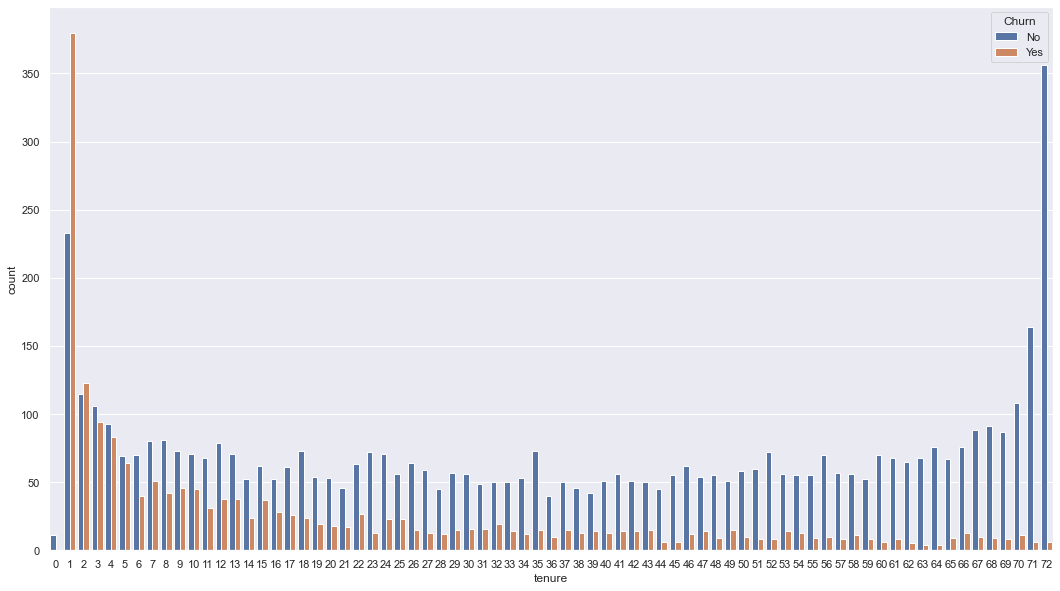

In [19]:
f, axes = plt.subplots(figsize=(18, 10))
sns.countplot(df_imputed["tenure"],hue = df_imputed["Churn"]);

In [21]:
# Tenure in months as year range
df['tenure_range'] = pd.cut(df.tenure,[0,12,24,36,48,60,72,84],3,
                            labels=['1 year','2 year','3 year', ' 4 year', '5 year', '6 year', '7 year'])

# change MonthlyCharges to categorical column 
def monthlycharges_split(df) : 
 if df['MonthlyCharges'] <= 30 :
     return '0–30'
 elif (df['MonthlyCharges'] > 30) & (df['MonthlyCharges'] <= 70 ):
     return '30–70'
 elif (df['MonthlyCharges'] > 70) & (df['MonthlyCharges'] <= 99 ):
     return '70–99'
 elif df['MonthlyCharges'] > 99 :
     return '99plus'
df['monthlycharges_bin'] = df.apply(lambda df:monthlycharges_split(df), axis = 1)

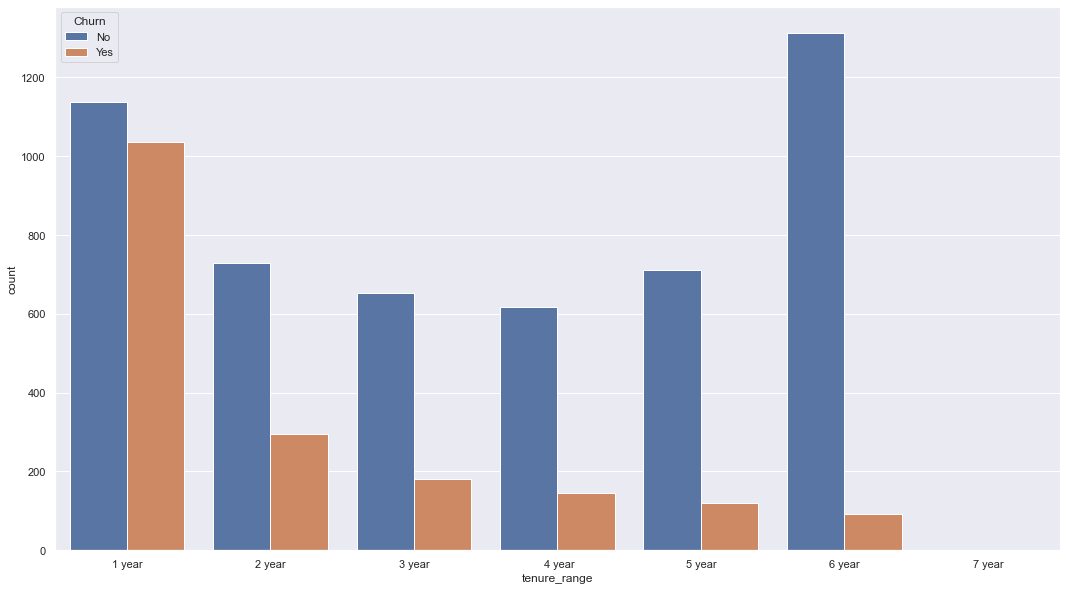

In [23]:
f, axes = plt.subplots(figsize=(18, 10))
sns.countplot(df["tenure_range"],hue = df["Churn"]);

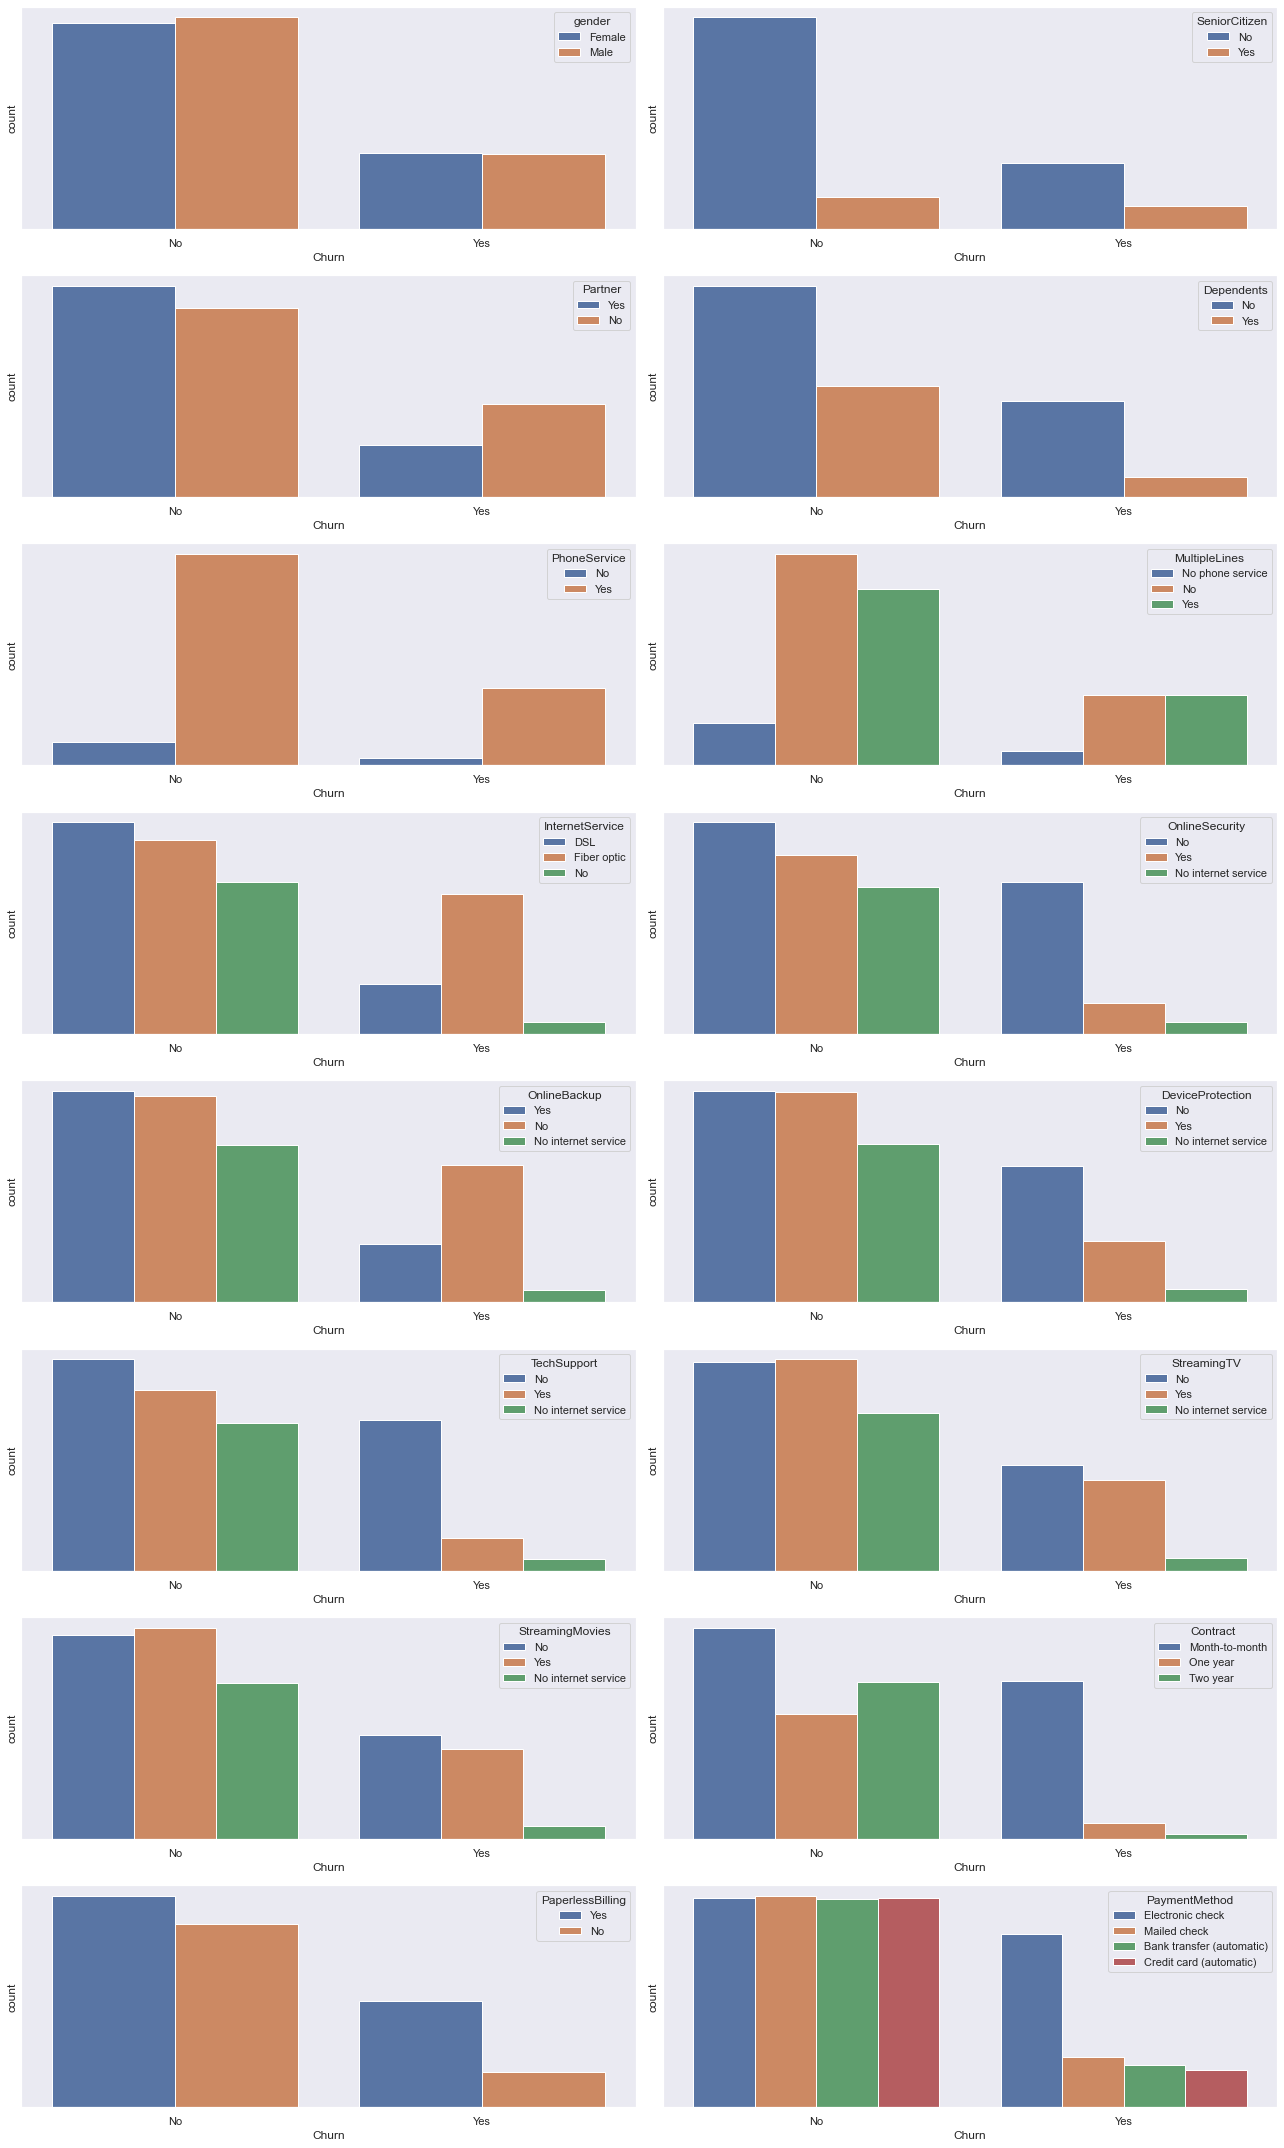

In [24]:
f, axes = plt.subplots(nrows=8, ncols=2, figsize=(18,30))

sns.countplot(df["Churn"],hue = df["gender"],ax = axes[0,0])
sns.countplot(df["Churn"],hue = df["SeniorCitizen"],ax = axes[0,1])
sns.countplot(df["Churn"],hue = df["Partner"],ax = axes[1,0])
sns.countplot(df["Churn"],hue = df["Dependents"],ax = axes[1,1])
sns.countplot(df["Churn"],hue = df["PhoneService"],ax = axes[2,0])
sns.countplot(df["Churn"],hue = df["MultipleLines"],ax = axes[2,1])
sns.countplot(df["Churn"],hue = df["InternetService"],ax = axes[3,0])
sns.countplot(df["Churn"],hue = df["OnlineSecurity"],ax = axes[3,1])
sns.countplot(df["Churn"],hue = df["OnlineBackup"],ax = axes[4,0])
sns.countplot(df["Churn"],hue = df["DeviceProtection"],ax = axes[4,1])
sns.countplot(df["Churn"],hue = df["TechSupport"],ax = axes[5,0])
sns.countplot(df["Churn"],hue = df["StreamingTV"],ax = axes[5,1])
sns.countplot(df["Churn"],hue = df["StreamingMovies"],ax = axes[6,0])
sns.countplot(df["Churn"],hue = df["Contract"],ax = axes[6,1])
sns.countplot(df["Churn"],hue = df["PaperlessBilling"],ax = axes[7,0])
sns.countplot(df["Churn"],hue = df["PaymentMethod"],ax = axes[7,1])

plt.setp(axes, yticks=[])
plt.tight_layout()

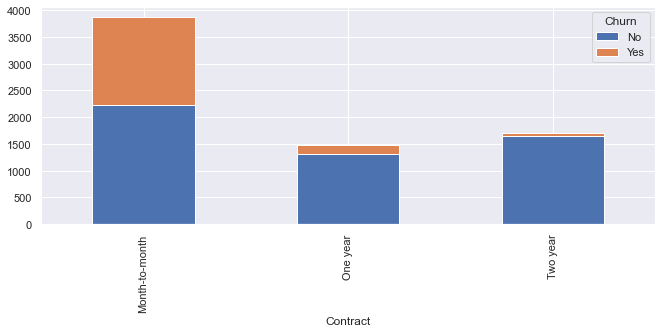

In [25]:
df.groupby(['Contract','Churn']).size().unstack().plot(kind='bar',stacked=True); 
#Clearly, users with Month-to-Month contract are more likely to churn 

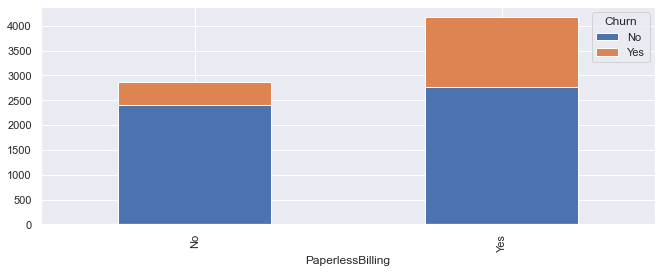

In [26]:
df.groupby(['PaperlessBilling','Churn']).size().unstack().plot(kind='bar',stacked=True);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

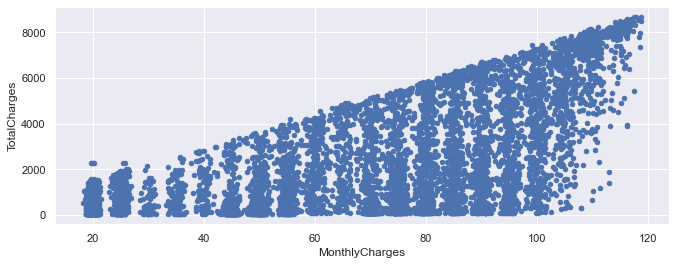

In [27]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y='TotalCharges')

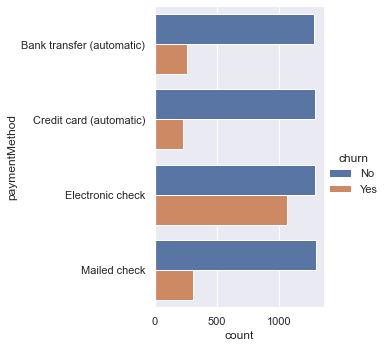

In [28]:
#payment method and churn
payment_method_count  = df_imputed[['PaymentMethod','Churn']].groupby(['PaymentMethod','Churn']).size().reset_index()
payment_method_count.columns = ['paymentMethod','churn','count']
sns.catplot(x = 'count',y='paymentMethod',hue='churn',data = payment_method_count,kind='bar')

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

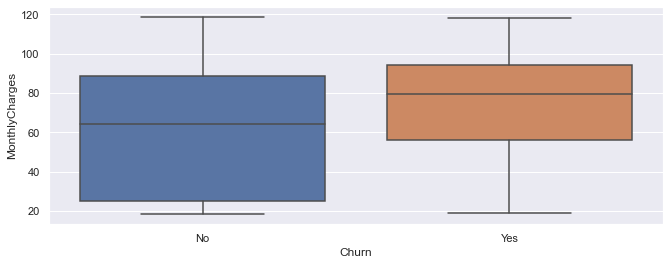

In [29]:
sns.boxplot(x = 'Churn',  y = 'MonthlyCharges', data = df_imputed)

In [30]:
def plot_distribution_num(df_num):
    sns.set_style('ticks')
    s = sns.FacetGrid(df,hue='Churn')
    s.map(sns.kdeplot,df_num,shade = True, alpha = 0.8)
    s.set(xlim=(0,df[df_num].max()))
    s.add_legend()
    s.set_axis_labels(df_num,'proportion')
    s.fig.suptitle(df_num)
    plt.show()

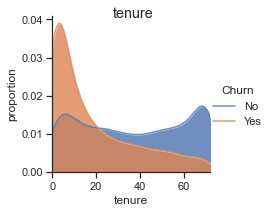

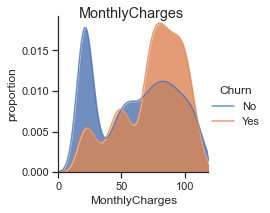

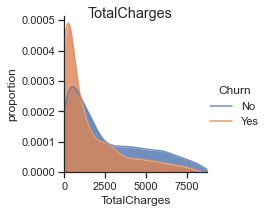

In [31]:
plot_distribution_num('tenure')
plot_distribution_num('MonthlyCharges')
plot_distribution_num('TotalCharges')

# Explore Joint Attributes - Explore relationships between attributes: Look at the attributes via scatterplots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.


In [ ]:
sns.swarmplot(x = 'SeniorCitizen', y = 'MonthlyCharges', hue="Churn", data = df_imputed)

In [ ]:
import numpy as np
corr_abs = df_imputed.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

In [ ]:
#Now, let's look at the numerical data. Creating correlation heatmap

sns.heatmap(df_imputed.corr(),annot=True);

#Tenure and TotalCharges, Monthly and TotalCharges are corelated and it makes sense,as totalcharges = tenure*MonthlyCharges

In [ ]:
sns.heatmap(df[['TotalCharges','MonthlyCharges']].corr(),annot=True,fmt='.3');
#Since, monthly and Total Charges are corelated.. We'd need to remove one of them, let's remove TotalCharges

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df_imputed.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

 # Question 1: Which customer has highest probability to switch to another telecom (known as Churn)
# Question 2: What could be the plausible reasons why churn is happening.
# Question 3: How good the prediction is? Can we rely on this predictive analytics.